In [ ]:
# %%capture

# !pip install ultralytics
# !pip install shapely

# !pip install -i https://test.pypi.org/simple/ supervision==0.3.0
# !pip install -q transformers
# !pip install -q pytorch-lightning
# !pip install -q timm

# #install important packages

In [4]:
from real_life import *
from ultralytics import YOLO
from numpy import asarray
from PIL import Image
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
from matplotlib.pyplot import figure
from transformers import DetrForObjectDetection, DetrImageProcessor


import cv2
import matplotlib.image as image
import pandas as pd
import numpy as np
import torch
import supervision
import transformers
import pytorch_lightning as pl
import supervision as sv
import json

### YOLO

In [ ]:
image = 'images/chess_board4.jpg'

corners = detect_corners(image)

print(corners)

transformed_image = four_point_transform(image, corners)

a, b = plot_grid_on_transformed_image(transformed_image)

labels, boxes = chess_pieces_detector(transformed_image)

FEN_annotations = FEN_annotation(ptsT=a,ptsL=b)

real_to_grafic(labels, a, b)

#### DETR

['LABEL_1 0.95', 'LABEL_1 0.93', 'LABEL_1 0.90', 'LABEL_1 0.90', 'LABEL_1 0.89']


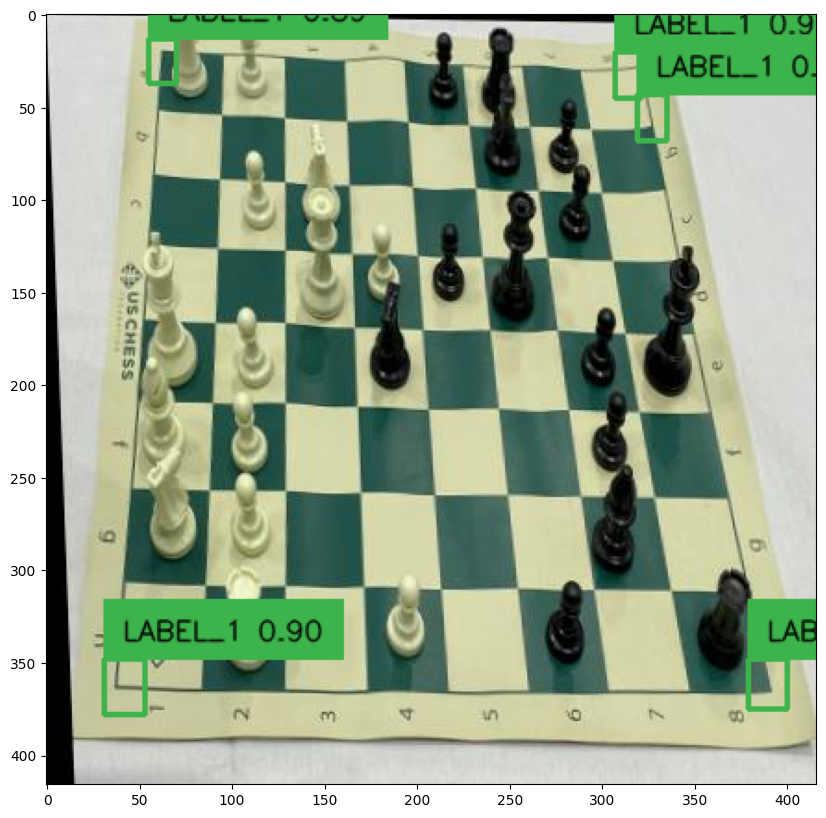

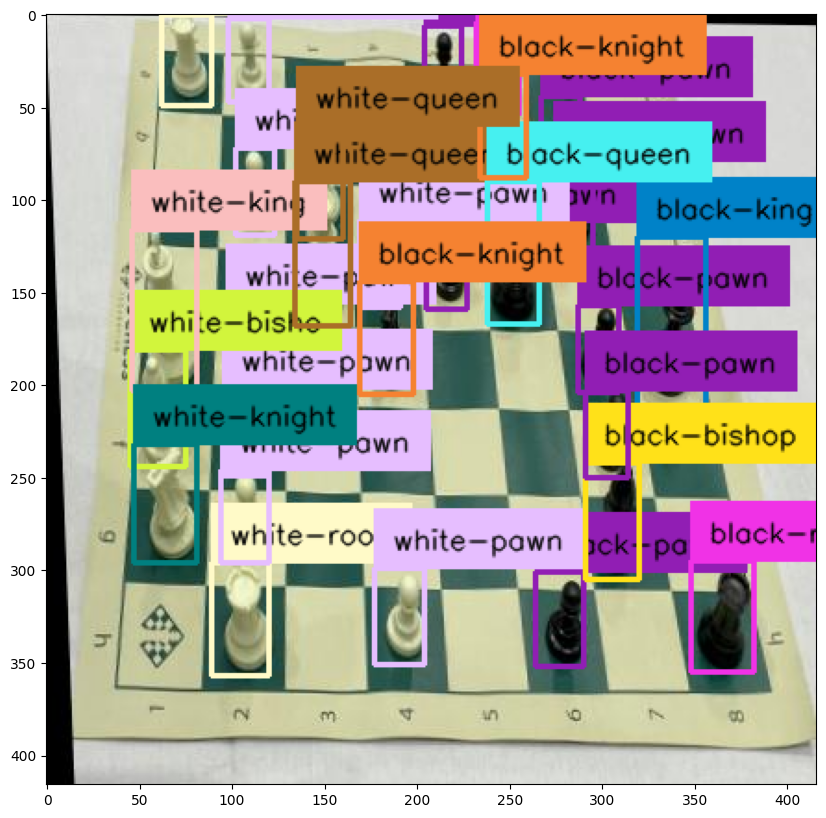

FEN Notation: RP2pr2/5np1/1PQ3p1/2QPpq2/KP1n2pk/BP4p1/NP4b1/1R1P1p1r
https://lichess.org/analysis/R/P/2/p/r/2///5/n/p/1///1/P/Q/3/p/1///2/Q/P/p/q/2///K/P/1/n/2/p/k///B/P/4/p/1///N/P/4/b/1///1/R/1/P/1/p/1/r


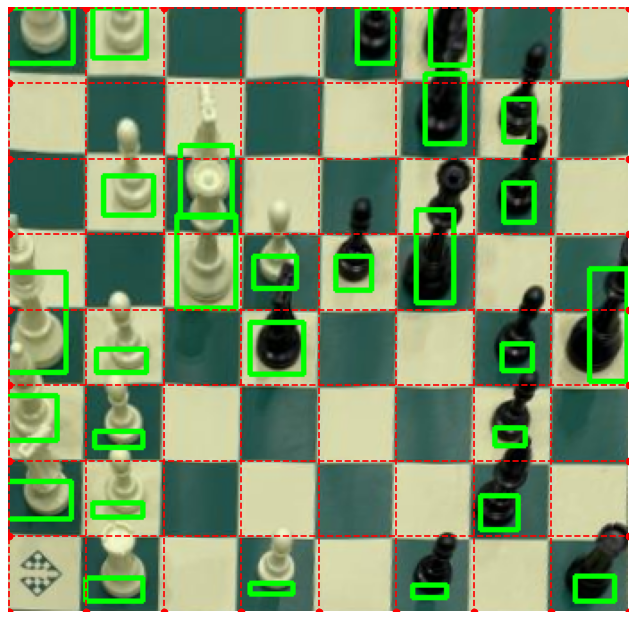

In [6]:
### COMPLETE WITH DETR

from PIL import Image

# Load the image
image_path = 'images/chess_board_8.jpg'

#corners = detect_corners(image)
corners = detect_corners_detr(image_path, MODEL_PATH = "models/model_corners_detr", CONFIDENCE_TRESHOLD=0.8, IOU_TRESHOLD= 0.7 ,visualize=True)

labels, boxes = chess_pieces_detector_detr(image_path, MODEL_PATH = "models/model_pieces_detr",CONFIDENCE_TRESHOLD=0.3, IOU_TRESHOLD=0.6)

# Replace these vectors with your actual vectors
input_vectors = boxes.reshape(-1,2)

# Get the transformed vectors
transformed_vectors = transform_vectors(corners, input_vectors)

transformed_vectors = transformed_vectors.reshape(boxes.shape)

transformed_image = four_point_transform(image_path, corners)
a, b = plot_grid_on_transformed_image(transformed_image)

for box in transformed_vectors:
    cv2.rectangle(transformed_image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)

# show the image
plt.imshow(transformed_image)

assigned_pieces = assign_pieces_from_real(a, b, labels, transformed_vectors)

fen_notation = create_fen(assigned_pieces)
print(f"FEN Notation: {fen_notation}")

to_FEN = '/'.join(fen_notation)

print("https://lichess.org/analysis/"+to_FEN)
